#### Machine Learning Engineer Nanodegree Capstone Project
#### Michael Seybold, 1/7/2018

#### Visualizations and statistics

#### Import a few common libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format

#### Reading in 1 moth of data for tests that took place during January, 2016.  Only pertinent columns are utilized.  Then let's look as some basic summary information on the raw data.  Codes are listed in the dictionaries below:

In [2]:
bar = pd.read_csv('ois_test_201601.csv', usecols = ['VEHICLESYSTEMNUMBER', 'VEHICLEMAKE', 'VEHICLEMODELYEAR',
                'INSPECTIONREASON', 'ODOMETERREADING', 'TESTSTARTDTTIME', 'TESTMONTH', 'TESTYEAR', 'OVERALLTESTRESULT'])
#'VEHICLEMODEL', 

#### Dictionaries for Overall test result and Inspection reason fields

In [6]:
results_dict = {'P': 'Pass', 'F': 'Fail', 'A': 'Abort', 'R': 'Not Ready', 'T': 'Tampered', 'I': 'Incomplete', 'U': 'Not Performed'}
inspect_dict = {'B':'Biennial', 'C':'Change of Ownership', 'I':'Initial Registration', 'S':'Random Sample', 'D':'Sample',
                'P':'High Emitter Profile', 'Z': 'Out of State Vehicle'}

In [15]:
print(bar.info())
print()
print('Test Results')
print(bar.OVERALLTESTRESULT.value_counts(normalize= True)*100)
print()
print('Inspection Reason')
print(bar.INSPECTIONREASON.value_counts())
print()
print('Description')
print(bar.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814990 entries, 0 to 814989
Data columns (total 10 columns):
TESTSTARTDTTIME        814990 non-null object
VEHICLESYSTEMNUMBER    814762 non-null float64
INSPECTIONREASON       814990 non-null object
OVERALLTESTRESULT      814990 non-null object
VEHICLEMODELYEAR       814990 non-null int64
VEHICLEMAKE            814667 non-null object
VEHICLEMODEL           814667 non-null object
ODOMETERREADING        814990 non-null int64
TESTYEAR               814990 non-null int64
TESTMONTH              814990 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 62.2+ MB
None

Test Results
P    90.912281
R     4.890121
F     2.854145
T     0.756819
A     0.586633
Name: OVERALLTESTRESULT, dtype: float64

Inspection Reason
B    373308
C    213795
P    168064
I     44101
S     13772
D      1607
Z       343
Name: INSPECTIONREASON, dtype: int64

Description
       VEHICLESYSTEMNUMBER  VEHICLEMODELYEAR  ODOMETERREADING  TESTYEAR  \
count  

#### Data sample:

In [8]:
bar.head()

TESTSTARTDTTIME  VEHICLESYSTEMNUMBER INSPECTIONREASON  \
0  01JAN2016:07:38:59.000000          162024238.0                I   
1  01JAN2016:08:00:55.000000          162024240.0                I   
2  01JAN2016:08:09:04.000000           55293544.0                P   
3  01JAN2016:08:09:29.000000          161774698.0                I   
4  01JAN2016:08:12:18.000000           40125673.0                C   

  OVERALLTESTRESULT  VEHICLEMODELYEAR VEHICLEMAKE     VEHICLEMODEL  \
0                 P              2015        JEEP    PATRIOT SPORT   
1                 P              2011       MAZDA          MAZDA3I   
2                 P              2002       VOLVO              V70   
3                 P              2013        FORD  ESCAPE TITANIUM   
4                 P              2000   CHEVROLET   K2500 SUBURBAN   

   ODOMETERREADING  TESTYEAR  TESTMONTH  
0            14679      2016          1  
1            65941      2016          1  
2           244044      2016          1  
3            10370      2016          1  
4           197967      2016          1

#### Data preparation
* model year > 1999, mileage <= 500,000
* inspection reason either B, P, S or D
* test month consistent with month of data
* make and model at least 500 and 100 tests, respectively (vehicle model not used in final algorithm)
* eliminate vehicles with 0 miles
* eliminate observations with NaN
* use only first test result for any given vehicle in a given month; also check for dupes that extend into following month if such data is used
* need to find 15% of cars more than 8 years old that are likely to pass the test

Data to include
* usecols = ['VEHICLESYSTEMNUMBER', 'VEHICLEMODELYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL','INSPECTIONREASON', 'ODOMETERREADING',                 'TESTSTARTDTTIME', 'TESTMONTH', 'TESTYEAR', 'OVERALLTESTRESULT']

In [6]:
reason = ['B', 'P', 'S', 'D']
bar_filter = bar.loc[bar['INSPECTIONREASON'].isin (reason)].copy()

In [7]:
bar_filter['vehicle_age'] = ((bar_filter.TESTYEAR) + 1) - bar_filter['VEHICLEMODELYEAR']
bar_filter['high_emitter'] = bar_filter['INSPECTIONREASON'].apply(lambda x: 1 if x == 'P' else 0)
bar_filter['pass_fail'] = bar_filter['OVERALLTESTRESULT'].apply(lambda x: 0 if x == "P" else 1)

bar_filter = bar_filter[(bar_filter['VEHICLEMODELYEAR'] > 1999)  & (bar_filter['ODOMETERREADING'] > 0) &
                  (bar_filter['vehicle_age'] > 8)] # & (bar_filter['ODOMETERREADING'] < 500000)

#### The relevant cohort of vehicles has an aggregate smog test pass rate of about 90%.  In the 9 month training set, this increases to about 93% after duplicate tests are removed. There are few null values.

In [8]:
print(bar_filter.info())
print()
print('Test Results')
print(bar_filter.pass_fail.value_counts(normalize= True) * 100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478070 entries, 2 to 814987
Data columns (total 12 columns):
TESTSTARTDTTIME        478070 non-null object
VEHICLESYSTEMNUMBER    478070 non-null float64
INSPECTIONREASON       478070 non-null object
OVERALLTESTRESULT      478070 non-null object
VEHICLEMODELYEAR       478070 non-null int64
VEHICLEMAKE            478003 non-null object
ODOMETERREADING        478070 non-null int64
TESTYEAR               478070 non-null int64
TESTMONTH              478070 non-null int64
vehicle_age            478070 non-null int64
high_emitter           478070 non-null int64
pass_fail              478070 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 47.4+ MB
None

Test Results
0   90.30
1    9.70
Name: pass_fail, dtype: float64


In [9]:
bar_filter = bar_filter.drop_duplicates(subset = ['VEHICLESYSTEMNUMBER'], keep = 'first')

In [11]:
bar_filter['pass_fail'].value_counts(normalize = True)*100

0   90.46
1    9.54
Name: pass_fail, dtype: float64

#### Generating chart for smog test pass rates

In [12]:
age_pass = bar_filter.groupby(['vehicle_age'])['pass_fail'].value_counts(normalize = True) * 100
age_pass = age_pass.to_frame()

In [13]:
age_pass.columns = ['pct']
age_pass.reset_index(level = 1, inplace = True)

In [14]:
age_pass = age_pass[age_pass['pass_fail'] == 0].drop('pass_fail', axis = 1)

Text(0.5,0,'Vehicle age')

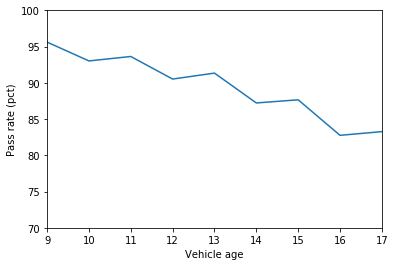

In [15]:
age_pass.plot(kind = 'line', ylim = (70,100), legend = False)
plt.ylabel('Pass rate (pct)')
plt.xlabel('Vehicle age')

In [28]:
bar_filter.groupby(['VEHICLEMODELYEAR'])['pass_fail'].value_counts(normalize = True) * 100

VEHICLEMODELYEAR  pass_fail
2000              0           83.23
                  1           16.77
2001              0           82.72
                  1           17.28
2002              0           87.64
                  1           12.36
2003              0           87.17
                  1           12.83
2004              0           91.32
                  1            8.68
2005              0           90.50
                  1            9.50
2006              0           93.62
                  1            6.38
2007              0           92.99
                  1            7.01
2008              0           95.61
                  1            4.39
2009              0           94.02
                  1            5.98
2010              0           96.68
                  1            3.32
2011              0           94.62
                  1            5.38
2012              0           94.10
                  1            5.90
2013              0           94.76


In [24]:
bar_filter.groupby(['VEHICLEMODELYEAR'])['OVERALLTESTRESULT'].value_counts(normalize = True) * 100

VEHICLEMODELYEAR  OVERALLTESTRESULT
2000              P                   83.23
                  R                    9.25
                  F                    5.49
                  T                    1.33
                  A                    0.70
2001              P                   82.72
                  R                    9.47
                  F                    5.75
                  T                    1.37
                  A                    0.69
2002              P                   87.64
                  R                    6.22
                  F                    4.31
                  T                    1.21
                  A                    0.63
2003              P                   87.17
                  R                    6.30
                  F                    4.47
                  T                    1.27
                  A                    0.79
2004              P                   91.32
                  R                    4

#### Number of tests per model year (Jan. 2016) and by vehicle age

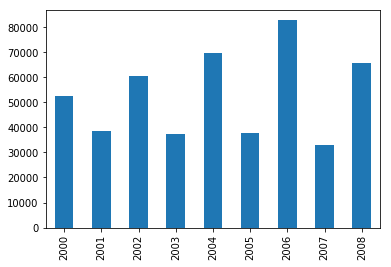

In [51]:
bar_filter['VEHICLEMODELYEAR'].value_counts(sort = False).plot(kind = 'bar')

Text(0.5,0,'Vehicle age')

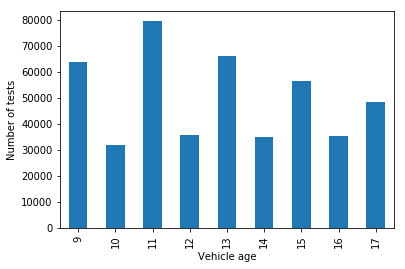

In [35]:
bar_filter['vehicle_age'].value_counts(sort = False).plot(kind = 'bar')
plt.ylabel('Number of tests')
plt.xlabel('Vehicle age')

#### Vehicles tested, by mileage

Text(0.5,0,'Mileage')

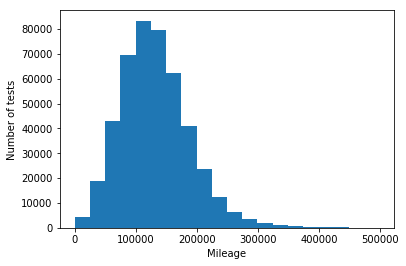

In [55]:
bar_filter.loc[bar_filter['ODOMETERREADING'] <= 500000, 'ODOMETERREADING'].hist(bins = 20, grid = False)
plt.ylabel('Number of tests')
plt.xlabel('Mileage')

#### Odometer reading box plot.  Lots of outliers above 300,000 miles

Text(0.5,0,'')

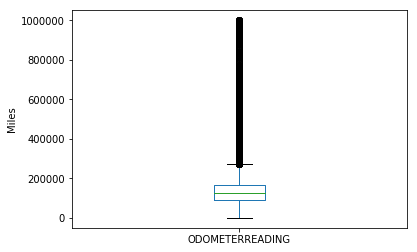

In [52]:
bar_filter['ODOMETERREADING'].plot(kind = 'box')
plt.ylabel('Miles')
plt.xlabel('')

In [57]:
print(bar_filter[['vehicle_age', 'ODOMETERREADING']].describe())

       vehicle_age  ODOMETERREADING
count   452,987.00       452,987.00
mean         12.78       132,113.13
std           2.57        58,820.32
min           9.00             1.00
25%          11.00        92,278.50
50%          13.00       126,642.00
75%          15.00       164,728.00
max          17.00       999,999.00


#### Prevalence of various makes in the data, by percentage

In [43]:
bar_filter["VEHICLEMAKE"].value_counts(normalize = True) * 100

TOYOTA            20.39
FORD              11.81
HONDA             11.65
CHEVROLET         10.30
NISSAN             6.31
DODGE              4.46
LEXUS              3.29
GMC                3.01
BMW                2.89
MERCEDES-BENZ      2.79
CHRYSLER           2.26
ACURA              1.86
VOLKSWAGEN         1.81
JEEP               1.69
HYUNDAI            1.51
MAZDA              1.50
MITSUBISHI         1.20
INFINITI           1.19
CADILLAC           1.05
SATURN             0.98
KIA                0.92
VOLVO              0.85
SUBARU             0.82
PONTIAC            0.77
LINCOLN            0.65
BUICK              0.65
AUDI               0.62
MERCURY            0.50
PORSCHE            0.35
JAGUAR             0.32
MINI               0.32
LAND ROVER         0.28
SUZUKI             0.26
HUMMER             0.15
ISUZU              0.14
SAAB               0.14
OLDSMOBILE         0.12
PLYMOUTH           0.06
DAEWOO             0.03
SMART              0.02
DCX SPRINTER       0.02
BENTLEY         